# Bericht zu Versuch 41 "$\beta$-Zerfall"

**Datum:** <2022-1M-DD>
 
 - **Student 1:** <vollständiger Name>
 - **Student 2:** <vollständiger Name>

## 1. Überblick

### 1.1 Einführung

- Um was geht es in dem Versuch? Was ist das Ziel?

### 1.2 Zusammenfassung der Theorie

- Erläuterung der benutzten Formeln inkl. Variablenbeschriftung (Bsp. vom Vorversuch)
    - Darstellung z.B. durch "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" --> $$T=2\pi\sqrt{\frac{L}{g}}$$, wobei $T$ die Schinwungsdauer des Pendels für eine Oszillation, $L$ die Länge des Pendels und $g$ die Erdbeschleunigung.
    - $$\phi = A \exp(-\frac{\gamma t}{2})\cos(\omega t + \alpha)$$, wobei $\phi$ die Auslenkung der Schwingung, $A$ die ursprüngliche Amplitude der Schwingung, $\gamma$ der Reibungskoeffizient und $\omega$ die Kreisfrequenz.

### 1.3 Aufgaben

- Was sind die Aufgabenstellungen für den Versuch?

### 1.4 Umweltrelevanz

- Inwiefern ist der Versuch relevant für euer Studium in Umweltwissenschaften? (1-2 Sätze)

## 2. Messdaten

### 2.1 Packages laden

In [1]:
# Importieren der benutzten Packages

# Meist benötigt: 
import numpy as np  # Math
from uncertainties import ufloat # ufloat( , ) für die Fehlerrechnung
from uncertainties.umath import *  # Für Funktionen wie sin, cos

# Falls benutzt
import pandas as pd # z.B. zum Importieren von Excel-Tabellen (csv-Files)
import matplotlib.pyplot as plt # Plotting
from matplotlib.pyplot import figure
from uncertainties import unumpy # für uncertainties in arrays
from scipy.stats import linregress # Lineare regression
from IPython.display import display_markdown


Tabulate installieren, um tabellen übersichtlich anzuzeigen

In [2]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2.2 Funktionen definieren 

#### 2.2.1 Some basics

In [3]:
# Funktionen schreiben und anwenden:
#
# Zuerst Funktion definieren
# def name_der_funktion(Eingabewert1, Eingabewert2, ...):
#     zu_berechnende_variable = Eingabewert1 * Eingabewert2
#     zu_berechnende_variable2 = Eingabewert1 + Eingabewert2
#     return zu_berechnende_variable, zu_berechnende_variable2, ...
#
# Anwendung:
# wert1, wert2 = name_der_funktion(Eingabewert1, Eingabewert2, ...)


# uarrays
# Beispieldaten
Messwerte = [1,2,3,2,5,7,4,5,2,1,4] # das ist ein array
Standardabweichung = np.std(Messwerte) # das ist ein float
Messwerte_mit_Fehler = unumpy.uarray(Messwerte,Standardabweichung) # das ist ein uarray

# Achtung!!!
# für Mittelwertberechnung ist folgendes nicht erlaubt, da so Fehlerfortpflanzung gemacht 
# wird, obwohl auch die Standardabweichung der Fehler des Mittelwerts ist:
Falscher_Mittelwert = np.mean(Messwerte_mit_Fehler)
# So geht es richtig
Mittelwert = ufloat(np.mean(Messwerte),Standardabweichung)
# Im Allgemeinen werden in der Auswertung ("beim Einsetzen in die Formel") ufloats mit 
# Mittelwert und Standardabweichung benutzt.

#### 2.2.2 Darstellen der Daten mit tabulate

In [4]:
# erfundene Beispieldaten, jede Liste muss gleich lang sein
Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = [1.42545,2.4235,3.324,4.435,5.135,6.46,7.24], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7]

table = [Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2] # kann beliebig erweitert werden. Falls der Fehler jedes Messwerts derselbe ist könnt ihr ihn auch in den header schreiben.
header = ['Titel1\n[Einheit]', 'Fehler_Titel1\n[Einheit]', 'Titel2', 'Fehler_Titel2'] # muss selbe Anzahl Einträge haben wie table.

#Funktion zum Tabellen erstellen aus einem table. Input: table(liste in liste), header
from tabulate import tabulate
def Tabelle(table, header, Kommastellen):
    for i in range(len(table)):
        for k in range(len(table[i])):
            table[i][k] = np.round(table[i][k], Kommastellen)
    table = np.matrix.transpose(np.array(table))
    print(tabulate(table, headers=header, tablefmt='fancy_grid'))
    return 

Tabelle(table, header, 2) # Hier wird die Funktion ausgeführt

╒═════════════╤═════════════════╤══════════╤═════════════════╕
│      Titel1 │   Fehler_Titel1 │   Titel2 │   Fehler_Titel2 │
│   [Einheit] │       [Einheit] │          │                 │
╞═════════════╪═════════════════╪══════════╪═════════════════╡
│        1.43 │               1 │        1 │               1 │
├─────────────┼─────────────────┼──────────┼─────────────────┤
│        2.42 │               2 │        2 │               2 │
├─────────────┼─────────────────┼──────────┼─────────────────┤
│        3.32 │               3 │        3 │               3 │
├─────────────┼─────────────────┼──────────┼─────────────────┤
│        4.43 │               4 │        4 │               4 │
├─────────────┼─────────────────┼──────────┼─────────────────┤
│        5.14 │               5 │        5 │               5 │
├─────────────┼─────────────────┼──────────┼─────────────────┤
│        6.46 │               6 │        6 │               6 │
├─────────────┼─────────────────┼──────────┼───────────

#### 2.2.3 Wichtige Funktionen
Reichweite der Elektronen in Aluminium Abhängigkeit der Energie (vgl. Abb. 4 in der Anleitung)

In [5]:
def Reichweite(E):
    '''
    Reichweite der Elektronen (Beta-Strahlung) in Aluminium (mg/cm^(-2))
    ala Funktion der Energie E (MeV) des Elektrons. 
    
    Referenz:
    Weber, Nuclear Instruments and Method 25 (1964) 261-264
    https://www.sciencedirect.com/science/article/pii/0029554X63901964?ref=cra_js_challenge&fr=RR-1
    '''
    a = 1.479e-3 # +- 0.0009 (MeV*cm^2/mg)
    A = 1/a
    B = 0.9852     # +- 0.008
    C = 3.73       # +- 0.12  (MeV^(-1))
    return A*E*(1-B/(1+C*E))

def Energie(R): # für Aufgabe 4 benötigt
    '''
    Energie (MeV) der Elektronen als Funktion ihrer Reichweite R in Aluminium (mg/cm^(-2))
    (iUmkehrfunktion von Reichweite(E))
    '''
    a = 1.479e-3 # +- 0.0009 (MeV*cm^2/mg)
    A = 1/a
    B=0.9852     # +- 0.008
    C=3.73       # +- 0.12  (MeV^(-1))
    return (A*B - A + C*R + (A**2*B**2 - 2*A**2*B + A**2 + 2*A*B*C*R + 2*A*C*R + C**2*R**2)**(1/2))/(2*A*C)

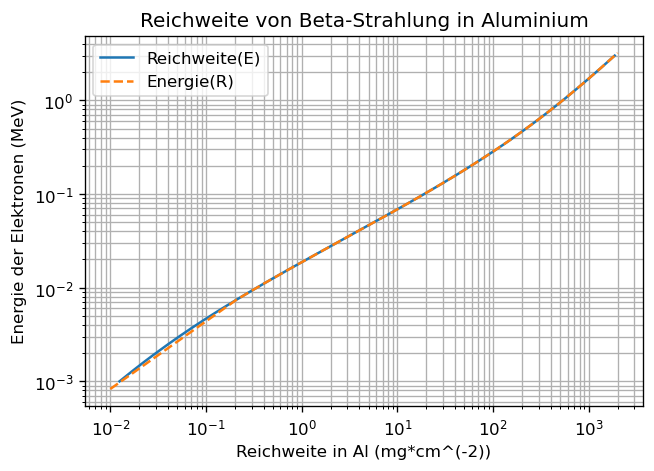

In [6]:
E = np.linspace(0.001,3,10000)
R = np.linspace(0.01,2000,10000)
figure(figsize=(6,4),dpi=120)
plt.loglog(Reichweite(E),E)
plt.loglog(R,Energie(R), linestyle='dashed')                
plt.grid(True, which="both", ls="-")
plt.ylabel("Energie der Elektronen (MeV)")
plt.xlabel("Reichweite in Al (mg*cm^(-2))")
plt.title("Reichweite von Beta-Strahlung in Aluminium")
plt.legend(['Reichweite(E)','Energie(R)'])
plt.show()

### 2.3 Messdaten einlesen

#### 2.3.1 Einlesen von Daten - Basics

In [7]:
#------------------------------------------------------------------------------------
# Möglichkeit 1: aus einer CSV Tabelle
#------------------------------------------------------------------------------------

#data = pd.read_csv('./pfad/zur/datei.csv') 
#Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = data.Spalte1, data.Spalte2, data.Spalte3, data.Spalte4

# jede Liste muss gleich lang sein
# die Spalte mit dem Namen 'Spalte1' wird in der Variable 'Messwerte1' gespeichert,
# die Spalte mit dem Namen 'Spalte2' wird in der Variable 'Messwerte2' gespeichert usw.

#------------------------------------------------------------------------------------
# Möglichkeit 2: manuell einlesen
#------------------------------------------------------------------------------------

Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7]

#### 2.3.2 Messwerte

<b>Hinweis zur Evaluation der Messfehler:</b>  
Die Schwankungen in der Zählrate bei radioaktiven Zerfällen folgen der Poisson-Verteilung.  
Das Uncertainties-Package (ufloat, uarray,...) verwendet allerdings die Gauss-Verteilung!

In [8]:
# Tipp: 
# Die Messwerte können hier direkt in Arrays eingetragen werden oder 
# zuerst in eine CSV-Tabelle und anschliessend eingelesen und in die Arrays gespeichert werden

#--------------------------------------------------------------------
# Aufgabe 1: Zählrohrcharakteristik
#--------------------------------------------------------------------

# Messdauer
t1 = ... # [Einheit]
# Spannung
V1 = ... # [Einheit]
# Zählrate
N1 = ... # [Einheit]


#--------------------------------------------------------------------
# Aufgabe 2: Aktivität der Quelle
#--------------------------------------------------------------------

# Messdauer
t2 = ... # [Einheit]
# Einfallende Teilchen in der Zeit t
N2 = ... # [Einheit]
# Hintergrund in der Zeit t (mit 8mm Stahl-Absorber)
N2_BG = ... # [Einheit]
# Effektive Anzahl einfallender Teilchen in der Zeit t 
# (= einfallende Teilchen minus Hintergrund)
N2_eff = ... # [Einheit]


#--------------------------------------------------------------------
# Aufgabe 4: Absorption der Beta-Energie
#--------------------------------------------------------------------
# TIPP: 
# Um Messwerte für möglichst viele verschiedene Dicken x zu erhalten, 
# kann es nützlich sein, die Plättchen zu kombinieren.

# Plättchendicke
x4 = ... # [Einheit]
# Messdauer
t4 = ... # [Einheit]
# Einfallende Teilchen in der Zeit t
N4 = ... # [Einheit]

## 3. Auswertung

#### Je nach Aufgabenstellung
- Graphische Darstellungen
- Berechnungen aller Resultate (inkl. Fehlerrechnung)
- Beantwortung der Aufgabenstellungen von 1 bis 4

### 3.1 Zählrohrcharakteristik

╒═════════╤═════════╤═════════╕
│ V [v]   │ t [s]   │ N [V]   │
╞═════════╪═════════╪═════════╡
╘═════════╧═════════╧═════════╛


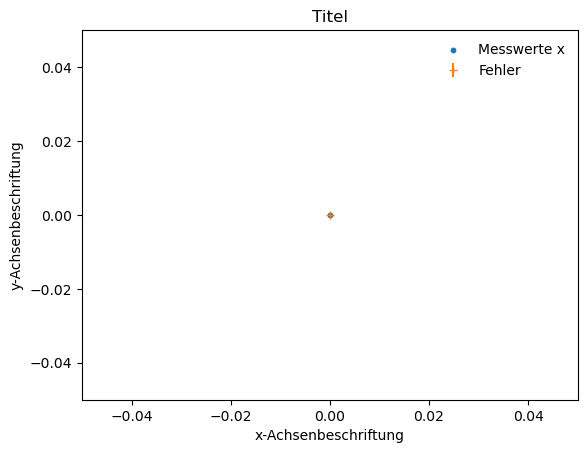


Spannung am Arbeitspunkt: $V_{ideal} =$ ...... $V$ 

Spannungsabhängigkeit der Zählrate bei $V_{ideal}$: $\frac{\Delta N/N}{\Delta V} =$ ......  $V^{-1}$ 

Je kleiner $\frac{\Delta N}{\Delta V}$, umso ......  (besser/schlechter) ist der Geierzähler.  


In [9]:
#-----------------------------------------------------------------------------------
# Übersichtliche (tabellarische) Darstellung der Resultate inkl. Fehler
#-----------------------------------------------------------------------------------

header1 = ['V [v]', 't [s]', 'N [V]'] 
table1 = [[],[],[],[]]
kommastellen1 = None

Tabelle(table1, header1, kommastellen1)


#------------------------------------------------------------------------------------
# Grafische Darstellung der Zählrate in abhängigkeit der Spannung
#------------------------------------------------------------------------------------

# N gegen V auftragen
# plotten indem man plt.plot([x-werte],[y-werte]) eingibt
# plt.errorbar fügt die Fehlerbalken für die y-Werte ein

plt.figure()
plt.scatter(0, 0, s=10, label='Messwerte x') # s = Grösse der Punkte
plt.plot(0, 0, linestyle='dashed')
plt.errorbar(0, 0, yerr=0, fmt='+', label = 'Fehler')
plt.title('Titel')
plt.ylabel('y-Achsenbeschriftung')
plt.xlabel('x-Achsenbeschriftung')
plt.legend(frameon=False, loc='upper right')
plt.margins(0) # gibt an, wie weit der Rand des Plots von den äussersten Messwerten entfernt ist
# falls die x-Achse gekürzt werden muss:
# plt.xlim(Anfang, Ende)
# Analog, mit der y-Achse:
# plt.ylim(tiefster_Wert, höchster_wert)

#------------------------------------------------------------------------------------
# Bestimmung der Steigung am Arbeitspunkt
#------------------------------------------------------------------------------------

# z.B. durch einen linearen Fit über den Geiger-Pateaubereich:

# 1. Welche Messwerte liegen im Plateaubereich?
#xfit = xwerte[a:b] # Erstellt ein Array mit den Elementen von 'xwerte' mit Indices a bis b
# analog für die y-Werte

# 2. Linearer Fit über relevante Werte (z.B. mit linregress )
#res = linregress(...,...) 
# res.slope -> Steigung k
# res.intercept -> Achsenabschnitt d

# 3. Fit im Plot darstellen
#x = np.linspace(xmin,xmax)
#y = k*x + d
plt.plot(0, 0, label='Fit (Geiger-Plateau)')

plt.show()


# V_ideal und Spannungsabhängigkeit der Zählrate
display_markdown('''
Spannung am Arbeitspunkt: $V_{ideal} =$ ...... $V$ \n
Spannungsabhängigkeit der Zählrate bei $V_{ideal}$: $\\frac{\\Delta N/N}{\\Delta V} =$ ......  $V^{-1}$ \n
Je kleiner $\\frac{\\Delta N}{\\Delta V}$, umso ......  (besser/schlechter) ist der Geierzähler.  
''', raw=True)


### 3.2 Aktivität der Quelle

#### Raumwinkelberechnung
Achtung: Winkel werden von Python standardgemäss in rad ausgegeben!

In [10]:
# Durchmesser Stahlblende: 
d = ... # [Einheit]

# Halbwinkel Kegel: 
theta = ... # [Einheit]

# Raumwinkelbruchteil / Akzeptanz: 
epsilon = ... # [Einheit]

#### Berechnung der Aktivität
Es kann angenommen werden, dass die Quelle näherungsweise uniform in alle Richtungen strahlt. Der Detektor "sieht" aber nur einen Bruchteil davon, den sg. "Raumwinkelbruchteil" oder "Akzeptanz". Damit lässt sich die Aktivität der Probe berechnen.

a) Was ist die Aktivität der hier verwendeten Probe?

In [11]:
# Berechnung

<b>Innerhalb der Stahlfolie</b> kann angenommen werden, dass je die Hälfte der Elektronen von Strontium- bzw. Yttrium-Zerfällen stammt.  
Vorsicht: Beim Durchgang durch die Stahlfolie werden die Elektronen aus den beiden Zerfällen unterschiedlich stark abgeschirmt, daher gilt diese Annahme <b>nicht</b> im Detektor, wo N gemessen wird!

b) Was ist die Aktivität der hier verwendeten Probe, wenn man die schützende Stahlfolie entfernen würde?

In [12]:
# Berechnung

### 3.3 Strahlentechnisch relevante Berechnungen

a) Wann ist die Gesamtaktivität auf 10 kBq gesunken?

In [13]:
# Berechnung

b) Angenommen, die Quelle wurde am 1.1.1950 hergestellt: Was war die Aktivität zum Herstellungszeitpunkt?

In [14]:
# Berechnung

c) Wie lange dauert es, bis die mittlere Jahresdosis in der Schweiz (= 5.5 mSv) bei <b>vollständiger Inkorporation</b> dieser Quelle erreicht wird?

In [15]:
# Berechnung

### 3.4 Absorption und $\beta$-Energie
<b>Hinweis:</b> Dichte $\rho (Al) = 2.69\,g\,cm^{-3}$  

╒════════╤═══════════════╤═══════╤═════╤═════════╤═══════════════════════╤═════════╕
│ x      │ ρ(Al)*x       │ t     │ N   │ N_eff   │ gemessene Aktivität   │ E(x)    │
│ [mm]   │ [g cm^(-2)]   │ [s]   │     │         │ [Bq]                  │ [MeV]   │
╞════════╪═══════════════╪═══════╪═════╪═════════╪═══════════════════════╪═════════╡
╘════════╧═══════════════╧═══════╧═════╧═════════╧═══════════════════════╧═════════╛


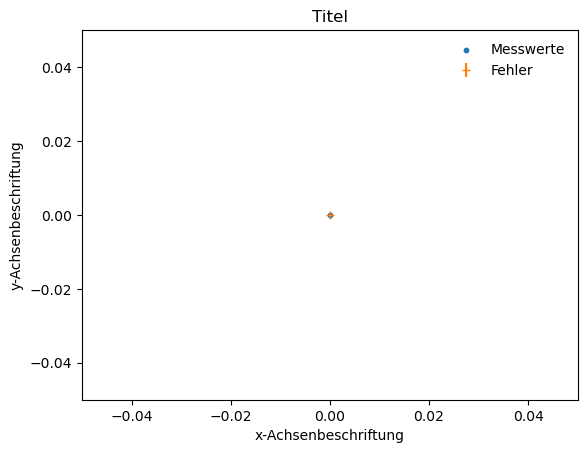

In [16]:
#-----------------------------------------------------------------------------------
# Übersichtliche (tabellarische) Darstellung der Resultate inkl. Fehler
#-----------------------------------------------------------------------------------

header1 = ['x\n[mm]', 'ρ(Al)*x\n[g cm^(-2)]', 't\n[s]', 'N','N_eff', 'gemessene Aktivität\n[Bq]', 'E(x)\n[MeV]'] # Einheiten [] bitte ergänzen
table1 = [[],[],[],[]]
kommastellen1 = None

Tabelle(table1, header1, kommastellen1)


#------------------------------------------------------------------------------------
# Grafische Darstellung der Absorptionskurve
#------------------------------------------------------------------------------------

# y-Achse: N/t
# x-Achse: x

plt.figure()
plt.scatter(0, 0, s=10, label='Messwerte') # s = Grösse der Punkte
plt.plot(0, 0, linestyle='dashed')
plt.errorbar(0, 0, yerr=0, fmt='+', label = 'Fehler')
plt.title('Titel')
plt.ylabel('y-Achsenbeschriftung')
plt.xlabel('x-Achsenbeschriftung')
plt.legend(frameon=False, loc='upper right')
plt.margins(0) # gibt an, wie weit der Rand des Plots von den äussersten Messwerten entfernt ist
# falls die x-Achse gekürzt werden muss:
# plt.xlim(Anfang, Ende)
# Analog, mit der y-Achse:
# plt.ylim(tiefster_Wert, höchster_wert)
plt.show()



#### 3.4.1 Bestimmung von $E_{max}$ über $x_{max}$

In [17]:

#------------------------------------------------------------------------------------
# Grafische Darstellung der Absorptionskurve (logarithmisch) zum Ablesen von x_max
#------------------------------------------------------------------------------------

# Plot:
# y-Achse: ln(N/t)
# x-Achse: x


# Ablesen von x_ max


#------------------------------------------------------------------------------------
# Berechnung von E_max
#------------------------------------------------------------------------------------

# Berechnung 


# Ergebnisse
display_markdown('''
Maximale Eindringtiefe der Elektronen: $\: x_{max} = ...... \, mm \, Al$ \n
Energie bei $x_{max}$: $\: E_{max} = ...... \, MeV $ \n
Energieverlust beim durchdringen der Stahlfolie: $\: \Delta E =  ...... \, MeV$ \n
Maximale Energie direkt in der Quelle: $\: E_{max,Quelle} = ...... \, MeV$
''', raw=True)



Maximale Eindringtiefe der Elektronen: $\: x_{max} = ...... \, mm \, Al$ 

Energie bei $x_{max}$: $\: E_{max} = ...... \, MeV $ 

Energieverlust beim durchdringen der Stahlfolie: $\: \Delta E =  ...... \, MeV$ 

Maximale Energie direkt in der Quelle: $\: E_{max,Quelle} = ...... \, MeV$


#### 3.4.2 Bestimmung von $E_{max}$ über $\mu$

In [18]:
#------------------------------------------------------------------------------------
# Grafische Darstellung der Absorptionskurve (logarithmisch) mit linearem Fit für x < x_max
#------------------------------------------------------------------------------------

# Plot:
# y-Achse: ln(N/t)
# x-Achse: x


# Linearer Fit für x < x_max


# Koeffizient (Steigung) mu


#------------------------------------------------------------------------------------
# Berechnung von E_max
#------------------------------------------------------------------------------------

# Berechnung 


# Ergebnisse
display_markdown('''
Koeffizient $\mu$: $\: \mu = ..... \, cm^{-1}$) \n
Maximale Energie der Elektronen nach der Folie: $\: E_{max} = ..... \, cm^{-1}$ \n
Energieverlust bei Durchdringen der Stahlfolie: $\: \Delta E = ..... \, MeV$ \n
Maximale Energie direkt in der Quelle: $\: E_{max,Quelle} = ...... \, MeV$
''', raw=True)



Koeffizient $\mu$: $\: \mu = ..... \, cm^{-1}$) 

Maximale Energie der Elektronen nach der Folie: $\: E_{max} = ..... \, cm^{-1}$ 

Energieverlust bei Durchdringen der Stahlfolie: $\: \Delta E = ..... \, MeV$ 

Maximale Energie direkt in der Quelle: $\: E_{max,Quelle} = ...... \, MeV$


### 3.5 Bestimmung der Genauigkeit

- Welche Messfehler wurden angenommen? Warum?
- Ausführung der Fehlerrechnung, falls nicht schon oben durchgeführt
- Überprüft nocheinmal, ob bei allen Messdaten und Ergebnissen die Fehler angegeben sind.

## 4. Bewertung und Einordnung der Ergebnisse

**Je nach Ergebnis:**

- Sind die Ergebnisse realistisch? Warum (nicht)? Vergleich mit Theorie?
- Was sind die Hauptgründe für die Fehler eurer Ergebnisse und wie kommen sie zustande?
- Wie würdet ihr versuchen, diese weiter zu verringern.
- Wenn ihr den Versuch wiederholen würdet, was würdet ihr anders machen und warum?
- Wie könnte man die Genauigkeit des Versuchs verbessern?

**Anmerkung: Bitte das Messblatt mit abgeben, wenn beim Protokollieren der Messwerte benutzt wurde.**